This step is to run logistic regression model.

# Import modules

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Exploratory analysis on the new data set

In [74]:
reg_df=pd.read_csv('reg_df.csv',index_col=0)

In [75]:
reg_df.head()

,hospital_death,age,fac_surgery,fac_apache,fac_d1_h1,fac_calcium,fac_albumin
0,0,68.0,-0.510279,-0.476342,1.999844,-0.502944,-0.510279
1,0,77.0,-0.508546,-0.468595,1.999702,-0.501839,-0.520722
2,0,25.0,-0.507723,-0.478581,1.999878,-0.506517,-0.507057
3,0,81.0,-0.507536,-0.479875,1.999892,-0.505867,-0.506614
4,0,19.0,-0.506768,-0.481848,1.999912,-0.505325,-0.505971


In [76]:
reg_df.info(verbose=True, null_counts=True) #to see length and dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 91712
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hospital_death  91713 non-null  int64  
 1   age             91713 non-null  float64
 2   fac_surgery     91713 non-null  float64
 3   fac_apache      91713 non-null  float64
 4   fac_d1_h1       91713 non-null  float64
 5   fac_calcium     91713 non-null  float64
 6   fac_albumin     91713 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.6 MB


In [77]:
reg_df.describe()

,hospital_death,age,fac_surgery,fac_apache,fac_d1_h1,fac_calcium,fac_albumin
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,62.309516,-0.507236,-0.480094,1.999205,-0.505549,-0.506326
std,0.280811,16.383883,0.012858,0.019927,0.050661,0.012868,0.012746
min,0.000000,16.000000,-1.111907,-0.562180,-1.999987,-0.630196,-0.762244
25%,0.000000,53.000000,-0.508938,-0.486066,1.999842,-0.507534,-0.508054
50%,0.000000,64.000000,-0.506660,-0.481877,1.999911,-0.505565,-0.505910
75%,0.000000,75.000000,-0.505088,-0.475889,1.999947,-0.503963,-0.504398
max,1.000000,89.000000,0.497714,1.619016,2.000000,0.497714,0.506846


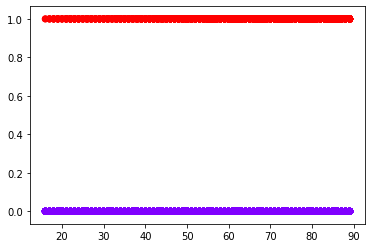

In [58]:
plt.scatter(reg_df.iloc[:,1],reg_df['hospital_death'],c = reg_df['hospital_death'], cmap='rainbow')
plt.show()

# Split data set

In [78]:
y=reg_df[['hospital_death']]
x=reg_df.iloc[:,1:]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [79]:
log_reg = LogisticRegression()
lr=log_reg.fit(x_train,y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
# Show Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[ 0.02639175 -0.19811095 -3.75239716  0.94315099  2.49518734  0.51216978]]
[-6.35089063]


In [81]:
#prediction
y_pred = lr.predict(x_test)

In [82]:
#displace confusion matrix
confusion_matrix(y_test, y_pred)

array([[20922,     0],
       [ 2007,     0]])

We could conclude from the above confusion matrix that: 

True positive: 20922 (upper-left) – Number of positives we predicted correctly

True negative: 0(lower-right) – Number of negatives we predicted correctly

False positive: 2007 (top-right) – Number of positives we predicted wrongly

False negative:  0(lower-left) – Number of negatives we predicted wrongly